<a href="https://colab.research.google.com/github/FelipeBrasill/Matem-tica-Computacional/blob/main/ATVIDADE_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade 2 - Matemática Computacional

$Aluno: Felipe \ Lisboa \ Brasil \ Matrícula:202404940029$

$Professor: Claudomiro \ Sales$

#Parte A

# Medição de Tempo


In [75]:
import time

# Funções auxiliares de medição
def marcar(lista):
    lista.append(time.perf_counter())

def calcular_intervalos_reais(lista_timestamps):
    return [lista_timestamps[i] - lista_timestamps[i-1]
            for i in range(1, len(lista_timestamps), 2)]

#Metodo da bisseção

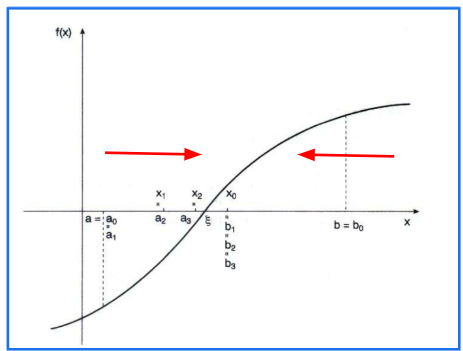


### Método da Bisseção

O **método da bisseção** é um método numérico utilizado para encontrar raízes de uma função contínua \( f(x) \).  
Ele se baseia no **Teorema do Valor Intermediário**: se \( f(a)\,f(b) < 0 \), então existe pelo menos uma raiz no intervalo \( (a,b) \).

---

### Ideia do Método

1. Escolhe-se um intervalo inicial \([a,b]\) tal que  
   \[
   f(a)\,f(b) < 0
   \]

2. Calcula-se o ponto médio do intervalo:
   \[
   m = \frac{a+b}{2}
   \]

3. Avalia-se o sinal de \( f(m) \):
   - se \( f(a)\,f(m) < 0 \), a raiz está em \([a,m]\);
   - caso contrário, a raiz está em \([m,b]\).

4. O processo é repetido até que o comprimento do intervalo seja menor que a tolerância desejada.

A cada iteração, o intervalo que contém a raiz é reduzido pela metade.

---

### Complexidade

- **Número de iterações necessárias**:
  \[
  k \ge \log_2\!\left(\frac{b-a}{\varepsilon}\right)
  \]
  onde \( \varepsilon \) é o erro máximo permitido.

- **Complexidade assintótica**:
  \[
  \mathcal{O}\!\left(\log\!\left(\frac{b-a}{\varepsilon}\right)\right)
  \]

- **Custo por iteração**:
  - uma avaliação da função \( f(x) \);
  - operações aritméticas simples.

---

### Observações

- O método possui **convergência garantida**, desde que \( f \) seja contínua e o intervalo inicial satisfaça a condição de mudança de sinal.
- Apresenta **convergência linear**, sendo mais lento que métodos como Newton ou secante.
- É um método **robusto e simples**, porém pouco eficiente quando se deseja alta precisão.

Em resumo, o método da bisseção é confiável e fácil de implementar, mas apresenta uma taxa de convergência relativamente lenta.


In [125]:
import random as rd
import time

def bissecao(funcao, a, b, erro=1e-6):
    '''
    1) dados iniciais:
        a) intervalo inicial [a,b]
        b) precisao erro
    '''
    timestamps = []
    xmedio = 0
    ai = a
    bi = b
    k = 0

    # Acumuladores de esforço
    ops_totais = 0
    decisoes_totais = 0

    while True:
        # --- MARCADOR DE INÍCIO DA ITERAÇÃO ---
        marcar(timestamps)

        # 4)
        M = funcao(ai)
        # 5)
        xmedio = (ai + bi) / 2 # +1 soma, +1 divisão
        # 6)
        if (M * funcao(xmedio) > 0): # +1 mult, +1 decisão lógica
            ai = xmedio
        else:
            bi = xmedio

        k = k + 1 # +1 soma


        ops_totais += 5
        decisoes_totais += 2

        # Verificação de saída
        if not ((bi - ai) > erro):
            # --- MARCADOR DE FIM (SAÍDA) ---
            marcar(timestamps)
            break

        # --- MARCADOR DE FIM (CONTINUAÇÃO) ---
        marcar(timestamps)

    # 2) se (b-a) < erro (FORA DO WHILE)
    return rd.uniform(ai, bi), calcular_intervalos_reais(timestamps), k, ops_totais, decisoes_totais

In [126]:
#ZONA DE TESTES
def funcao(x):
  #edite a funcao aqui
  return x**2-2
bissecao(funcao,0,2)

(1.4142136149354265,
 [3.050001396331936e-06,
  3.5800003388430923e-06,
  1.2799991964129731e-06,
  8.700008038431406e-07,
  1.0200001270277426e-06,
  7.100006769178435e-07,
  7.599992386531085e-07,
  4.4000080379191786e-07,
  5.399997462518513e-07,
  5.600013537332416e-07,
  6.300015229498968e-07,
  4.4999978854320943e-07,
  6.800000846851617e-07,
  5.099991540191695e-07,
  5.299989425111562e-07,
  4.899993655271828e-07,
  6.700010999338701e-07,
  4.4000080379191786e-07,
  4.3000000005122274e-07,
  3.5999983083456755e-07,
  6.300015229498968e-07],
 21,
 105,
 42)

#Metodo da Posição Falsa

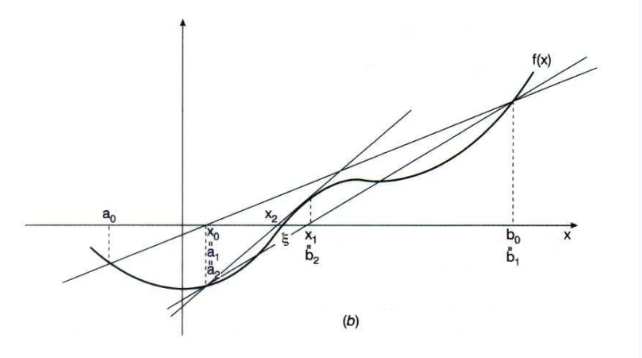

### Método da Posição Falsa (Regula Falsi)

O **método da posição falsa** é um método numérico para encontrar raízes de uma função contínua \( f(x) \).  
Assim como a bisseção, ele se baseia no **Teorema do Valor Intermediário**, exigindo um intervalo inicial \([a,b]\) tal que
\[
f(a)\,f(b) < 0.
\]

---

### Ideia do Método

1. Escolhe-se um intervalo inicial \([a,b]\) com mudança de sinal.
2. Em vez do ponto médio, calcula-se o ponto de interseção da **reta secante** que liga \((a,f(a))\) e \((b,f(b))\) com o eixo \(x\):
   \[
   x_c = \frac{a f(b) - b f(a)}{f(b) - f(a)}.
   \]
3. Avalia-se o sinal de \( f(x_c) \):
   - se \( f(a)\,f(x_c) < 0 \), a raiz está em \([a,x_c]\);
   - caso contrário, está em \([x_c,b]\).
4. O processo é repetido até que o erro seja menor que a tolerância desejada.

O intervalo continua contendo a raiz, mas **não é reduzido simetricamente** como na bisseção.

---

### Complexidade

- **Número de iterações**: depende do comportamento da função e da posição da raiz.
- **Complexidade assintótica**:  
  \[
  \mathcal{O}(k),
  \]
  onde \( k \) é o número de iterações necessárias para atingir a precisão desejada.
- **Custo por iteração**:
  - uma avaliação de \( f(x) \);
  - operações aritméticas simples.

---

### Observações

- Possui **convergência garantida**, desde que a função seja contínua e o intervalo inicial esteja correto.
- A convergência é **linear**, geralmente mais rápida que a bisseção.
- Pode sofrer de **lentidão** quando um dos extremos do intervalo permanece fixo por muitas iterações.
- Serve como base para variações melhoradas, como o método de **Illinois** e **Pegasus**.

Em resumo, o método da posição falsa combina a robustez da bisseção com a ideia geométrica da secante, oferecendo maior eficiência em muitos casos, mas sem garantia de aceleração uniforme.


In [127]:
import random
import time

def posicaofalsa(funcao, a, b, erro1=1e-6, erro2=1e-6):
    timestamps = []
    """
    Passo 1
    Método da posição falsa para encontrar raiz de f(x) em [a,b]
    """
    # Passo 2:
    if b - a < erro1:
        return random.uniform(a, b), [], 0, 0, 0
    if abs(funcao(a)) < erro2:
        return a, [], 0, 0, 0
    if abs(funcao(b)) < erro2:
        return b, [], 0, 0, 0

    # Passo 3:
    k = 1
    ai = a
    bi = b

    # Acumuladores de esforço
    ops_totais = 0
    decisoes_totais = 0

    while True:
        # --- MARCADOR DE INÍCIO DA ITERAÇÃO ---
        marcar(timestamps)

        # Passo 4: M = f(a)
        M = funcao(ai)

        # Passo 5:
        f_ai = funcao(ai)
        f_bi = funcao(bi)

        # Cálculo da raiz aproximada pela linha secante
        # Ops: ai*f_bi (1), bi*f_ai (1), subtraçao (1), f_bi-f_ai (1), divisão (1) = 5
        x = (ai*f_bi - bi*f_ai) / (f_bi - f_ai)
        f_x = funcao(x)

        # Esforço da iteração atual:
        # Ops: Cálculo de x (5), M*f_x (1), bi-ai (1), k+1 (1) = 8 operações
        # Decisões: if abs(f_x) (1), if M*f_x (1), if abs(bi-ai) (1) = 3 decisões
        ops_totais += 8
        decisoes_totais += 3

        # Passo 6: critério de parada pela função
        if abs(f_x) < erro2:
            marcar(timestamps) # Fim da iteração de saída
            return x, calcular_intervalos_reais(timestamps), k, ops_totais, decisoes_totais

        # Passos 7 e 8:
        if M * f_x > 0:
            ai = x
        else:
            bi = x

        # Passo 9: critério de parada pelo intervalo
        if abs(bi - ai) < erro1:
            marcar(timestamps) # Fim da iteração de saída
            return random.uniform(ai, bi), calcular_intervalos_reais(timestamps), k, ops_totais, decisoes_totais

        # Passo 10
        k += 1

        # --- MARCADOR DE FIM (CONTINUAÇÃO) ---
        marcar(timestamps)

    return (ai + bi)/2, calcular_intervalos_reais(timestamps), k, ops_totais, decisoes_totais

In [129]:
#ZONA DE TESTES
def funcao(x):
  #edite a funcao aqui
  return x**2-2
posicaofalsa(funcao,0,2)

(1.4142134998513232,
 [3.3899996196851134e-06,
  3.3899996196851134e-06,
  1.7099991964641958e-06,
  1.2700002116616815e-06,
  1.019998308038339e-06,
  9.299983503296971e-07,
  9.999985195463523e-07,
  8.299994078697637e-07,
  1.059999704011716e-06,
  1.0300009307684377e-06],
 10,
 80,
 30)

#Metodo do Ponto Fixo

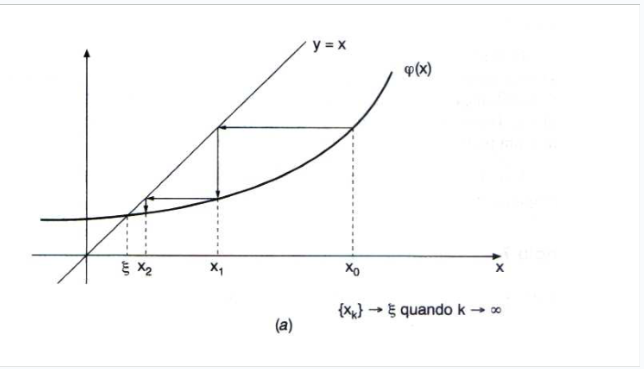

### Método do Ponto Fixo

O **método do ponto fixo** é um método iterativo para encontrar soluções de equações da forma

$$
f(x) = 0
$$

reformulando o problema como

$$
x = \varphi(x).
$$

A raiz procurada corresponde a um **ponto fixo** da função $\varphi$, isto é, um valor $x^*$ tal que

$$
x^* = \varphi(x^*).
$$

---

### Ideia do Método

1. Reescreve-se a equação $f(x) = 0$ na forma
   $$
   x = \varphi(x).
   $$

2. Escolhe-se um valor inicial $x_0$.

3. Gera-se a sequência iterativa:
   $$
   x_{k+1} = \varphi(x_k), \quad k = 0,1,2,\dots
   $$

4. O processo é repetido até que a diferença entre duas iterações sucessivas seja menor que a tolerância desejada.

---

### Condição de Convergência

A convergência local do método é garantida se:

$$
|\varphi'(x^*)| < 1,
$$

onde $x^*$ é o ponto fixo (raiz da equação).

---

### Complexidade

- **Número de iterações**: depende da escolha de $\varphi$ e do chute inicial.

- **Complexidade assintótica**:
  $$
  \mathcal{O}(k),
  $$
  onde $k$ é o número de iterações necessárias.

- **Custo por iteração**:
  - uma avaliação de $\varphi(x)$;
  - operações aritméticas simples.

---

### Observações

- O método pode **convergir ou divergir**, dependendo da função $\varphi$.
- Apresenta **convergência linear** quando converge.
- A escolha de $\varphi$ é crucial para a estabilidade e a velocidade do método.
- Serve como base teórica para métodos mais eficientes, como o **método de Newton**.

Em resumo, o método do ponto fixo é simples e conceitualmente elegante, mas exige cuidado na reformulação da equação para garantir convergência.


In [130]:
from os import times
import time

def pontofixo(funcao, x0, erro1=1e-6, erro2=1e-6, max_iter=100):
    timestamps = []
    xi = x0

    # Acumuladores de esforço
    ops_totais = 0
    decisoes_totais = 0

    # Passo 2
    # Ops: 1 subtração | Decisões: 1 comparação
    if abs(funcao(xi) - xi) < erro1:
        return xi, [], 0, 0, 0 # Retorna raiz, tempos, k, ops, dec

    # Passo 3
    for k in range(max_iter):
        # --- MARCADOR DE INÍCIO DA ITERAÇÃO ---
        marcar(timestamps)

        # passo 4
        xi_mais1 = funcao(xi)

        # Esforço da iteração atual:
        # Ops: xi_mais1 - xi (1), f(xi_m1) - xi_m1 (1) = 2 operações
        # Decisões: if (abs < erro2), if (abs < erro1) = 2 decisões
        ops_totais += 2
        decisoes_totais += 2

        # passo 5
        if abs(xi_mais1 - xi) < erro2 or abs(funcao(xi_mais1) - xi_mais1) < erro1:
            # --- MARCADOR DE FIM (SAÍDA) ---
            marcar(timestamps)
            return xi_mais1, calcular_intervalos_reais(timestamps), k + 1, ops_totais, decisoes_totais

        # Passo 6
        xi = xi_mais1

        # --- MARCADOR DE FIM (CONTINUAÇÃO) ---
        marcar(timestamps)
        # passo 7 (k+1 implícito no for)

    return xi, calcular_intervalos_reais(timestamps), max_iter, ops_totais, decisoes_totais

In [131]:
#ZONA DE TESTES
def funcao(x):
  #edite a funcao aqui
  return (x + 2/x) / 2
pontofixo(funcao,2)

(1.4142135623746899,
 [1.9600011000875384e-06,
  1.5000005078036338e-06,
  8.900005923351273e-07,
  6.699992809444666e-07],
 4,
 8,
 8)

#Metodo de Newton - Raphson

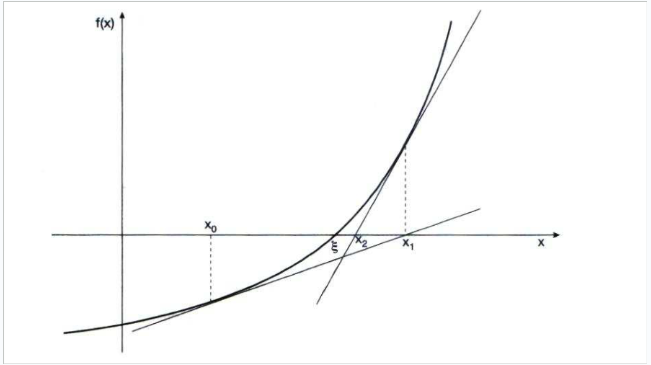

### Método de Newton–Raphson

O **método de Newton–Raphson** é um método iterativo para encontrar raízes de equações da forma

$$
f(x) = 0.
$$

Ele utiliza informações da **derivada da função**, interpretando o processo como uma aproximação sucessiva por **retas tangentes** ao gráfico de \( f(x) \).

---

### Ideia do Método

Dado um valor inicial $x_0$, constrói-se a reta tangente ao gráfico de $f(x)$ no ponto $(x_k, f(x_k))$ e toma-se como nova aproximação o ponto onde essa reta intercepta o eixo $x$.

A fórmula iterativa é:

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

Esse processo é repetido até que o erro seja menor que a tolerância desejada.

---

### Interpretação Geométrica

- Cada iteração corresponde à interseção da **reta tangente** com o eixo $x$.
- A convergência ocorre quando as tangentes passam a “apontar” diretamente para a raiz.
- Quando o chute inicial é adequado, o método converge muito rapidamente.

---

### Condição de Convergência

A convergência local é garantida se:
- $f'(x^*) \neq 0$ na raiz $x^*$;
- o chute inicial estiver suficientemente próximo da raiz.

Nessas condições, o método apresenta **convergência quadrática**.

---

### Complexidade

- **Número de iterações**: pequeno quando há convergência.
- **Complexidade assintótica**:
  $$
  \mathcal{O}(k),
  $$
  onde $k$ é o número de iterações.
- **Custo por iteração**:
  - uma avaliação de $f(x)$;
  - uma avaliação de $f'(x)$.

---

### Observações

- O método é **rápido**, mas **não é globalmente convergente**.
- Pode divergir se o chute inicial for ruim ou se $f'(x)$ for próximo de zero.
- Para polinômios, o uso do **Newton–Horner** reduz significativamente o custo computacional.
- Pode ser visto como um caso particular do método do ponto fixo.

Em resumo, o método de Newton–Raphson é extremamente eficiente quando bem aplicado, mas exige cuidado na escolha do chute inicial e no comportamento da derivada.


In [132]:
import numpy as np
import time

def derivada_iterativa(f, x, erro=1e-6):
    h = 0.1
    # Ops: x+h(1), x-h(1), f1-f2(1), 2*h(1), div(1) = 5
    d_ant = (f(x + h) - f(x - h)) / (2*h)

    ops_der = 5
    dec_der = 0

    while True:
        h /= 2 # 1 op
        # Ops: x+h(1), x-h(1), f1-f2(1), 2*h(1), div(1) = 5
        d_novo = (f(x + h) - f(x - h)) / (2*h)

        ops_der += 6
        dec_der += 1

        if abs(d_novo - d_ant) < erro:
            return d_novo, ops_der, dec_der
        d_ant = d_novo

def metodonewton(funcao, x0, erro1=1e-6, erro2=1e-6):
    timestamps = []
    xi = x0
    k = 0

    ops_totais = 0
    decisoes_totais = 0

    if abs(funcao(xi)) < erro1:
        return xi, [], 0, 0, 0

    while True:
        # --- MARCADOR DE INÍCIO DA ITERAÇÃO ---
        marcar(timestamps)

        fxi = funcao(xi)
        # Chamada da derivada retorna valor e esforço gasto nela
        dfxi, ops_da_der, dec_da_der = derivada_iterativa(funcao, xi)

        ops_totais += ops_da_der
        decisoes_totais += dec_da_der

        if dfxi == 0:
            raise ZeroDivisionError("Derivada zero, método não converge")

        # Atualização de Newton
        # Ops: fxi/dfxi (1), xi - resultado (1), k+1 (1) = 3
        x_next = xi - fxi / dfxi
        k += 1

        # Esforço adicional da iteração:
        # Ops: f(x_next) (avaliado no if), abs(x_next - xi) (1) = 1 (fora a derivada)
        # Decisões: if dfxi==0 (1), if criteria (1) = 2
        ops_totais += 3 + 1
        decisoes_totais += 2

        # Critérios de parada
        if abs(funcao(x_next)) < erro1 or abs(x_next - xi) < erro2:
            # --- MARCADOR DE FIM (SAÍDA) ---
            marcar(timestamps)
            return x_next, calcular_intervalos_reais(timestamps), k, ops_totais, decisoes_totais

        xi = x_next

        # --- MARCADOR DE FIM (CONTINUAÇÃO) ---
        marcar(timestamps)

In [133]:
#ZONA DE TESTES
def funcao(x):
  #edite a funcao aqui
  return x**2-2
metodonewton(funcao,2)

(1.4142135623746899,
 [9.290000889450312e-06,
  4.790001185028814e-06,
  3.040000592591241e-06,
  1.4000015653437003e-06],
 4,
 60,
 12)

#Método da Secante

### Método da Secante

O **método da secante** é um método iterativo para encontrar raízes de equações da forma

$$
f(x) = 0.
$$

Ele é semelhante ao método de Newton, porém **não utiliza a derivada**.  
No lugar da reta tangente, o método usa uma **reta secante** construída a partir de dois pontos da função.

---

### Ideia do Método

1. Escolhem-se dois valores iniciais distintos $x_0$ e $x_1$.
2. Traça-se a reta secante que passa pelos pontos  
   $(x_0, f(x_0))$ e $(x_1, f(x_1))$.
3. A interseção dessa reta com o eixo $x$ fornece a próxima aproximação.

A fórmula iterativa é:

$$
x_{k+1}
=
x_k
-
f(x_k)\,
\frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}.
$$

O processo se repete até atingir a precisão desejada.

---

### Complexidade

- **Complexidade assintótica**:
  $$
  \mathcal{O}(k),
  $$
  onde $k$ é o número de iterações.
- **Custo por iteração**:
  - duas avaliações de $f(x)$;
  - operações aritméticas simples.

---

### Observações

- Não exige o cálculo da derivada.
- Converge mais rápido que a bisseção na maioria dos casos.
- Pode falhar se os valores iniciais forem mal escolhidos.
- Possui convergência **superlinear**.

Em resumo, o método da secante é simples, rápido e prático, mas menos robusto que métodos baseados em intervalo.


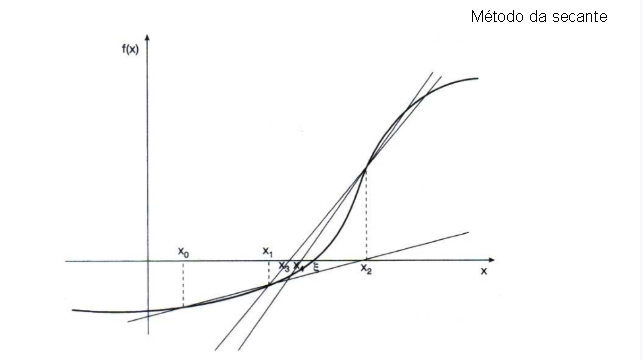

In [65]:
import time

# 1) Dados iniciais
def secante(funcao, x0, x1, erro1=1e-6, erro2=1e-6):
    timestamps = []

    # Acumuladores de esforço
    ops_totais = 0
    decisoes_totais = 0

    # 2) verificação do criterio de parada
    if abs(funcao(x0)) < erro1:
        return x0, [], 0, 0, 0 # Raiz, tempos, k, ops, dec
    # 3) ''
    if abs(funcao(x1)) < erro1 or abs(x1 - x0) < erro1:
        return x1, [], 0, 0, 0

    # 4)
    k = 1
    xi = 0

    while True:
        # --- MARCADOR DE INÍCIO DA ITERAÇÃO ---
        marcar(timestamps)

        # 5) Cálculo do próximo ponto
        # Ops: x1-x0 (1), f(x1)*diff (1), f(x1)-f(x0) (1), div (1), x1-resultado (1) = 5
        f_x0 = funcao(x0)
        f_x1 = funcao(x1)
        xi = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Esforço da iteração atual:
        # Ops: Cálculo de xi (5), f(xi) (avaliado no if), xi-x1 (1), k+1 (1) = 7
        # Decisões: if (abs(f(xi)) < e1) (1), abs(xi-x1) < e2 (1) = 2
        ops_totais += 7
        decisoes_totais += 2

        # 6) Critérios de parada
        if (abs(funcao(xi)) < erro1) or abs(xi - x1) < erro2:
            # --- MARCADOR DE FIM (SAÍDA) ---
            marcar(timestamps)
            return xi, calcular_intervalos_reais(timestamps), k, ops_totais, decisoes_totais

        # 7) Atualização dos pontos
        x0 = x1
        x1 = xi

        # 8)
        k = k + 1

        # --- MARCADOR DE FIM (CONTINUAÇÃO) ---
        marcar(timestamps)

In [57]:
#ZONA DE TESTES
def funcao(x):
  #edite a funcao aqui
  return x**2-2
secante(funcao,0,2)

(1.4142135626888697,
 [3.5600005503511056e-06,
  3.1099998523131944e-06,
  1.7900001694215462e-06,
  9.899995347950608e-07,
  9.300001693191007e-07,
  7.500002539018169e-07],
 6)

#Tabela 1

In [87]:
import numpy as np


def f(x):
    return np.exp(-x**2) - np.cos(x)

def phi(x):
    # Função de iteração para o MPF
    return np.cos(x) - np.exp(-x**2) + x

# --- GERADOR DE TABELA ---
def gerar_tabela_exemplo_18():
    # Parâmetros do exercício
    erro = 1e-4

    # Execução dos métodos
    res_bis = bissecao(f, 1, 2, erro)
    res_pos = posicaofalsa(f, 1, 2, erro, erro)
    res_mpf = pontofixo(phi, 1.5, erro, erro)
    res_new = metodonewton(f, 1.5, erro, erro)
    res_sec = secante(f, 1, 2, erro, erro)

    metodos = ["Bisseção", "Posição Falsa", "MPF", "Newton", "Secante"]
    resultados = [res_bis, res_pos, res_mpf, res_new, res_sec]
    dados_iniciais = ["[1, 2]", "[1, 2]", "x0 = 1.5", "x0 = 1.5", "x0=1; x1=2"]

    # Formatação da Tabela
    header = f"{'':<15} | {'Bisseção':<14} | {'Pos. Falsa':<14} | {'MPF':<14} | {'Newton':<14} | {'Secante':<14}"
    separator = "-" * len(header)

    print("\nExemplo 18 - Comparação entre os métodos")
    print(f"f(x) = e^-x² - cos(x) | Erro = {erro}\n")
    print(header)
    print(separator)

    # Linha: Dados Iniciais
    row_dados = f"{'Dados Iniciais':<15} | " + " | ".join(f"{d:<14}" for d in dados_iniciais)
    print(row_dados)

    # Linha: Raiz encontrada (x barra)
    row_x = f"{'x̄':<15} | " + " | ".join(f"{res[0]:<14.8f}" for res in resultados)
    print(row_x)

    # Linha: f(x barra)
    row_fx = f"{'f(x̄)':<15} | " + " | ".join(f"{f(res[0]):<14.2e}" for res in resultados)
    print(row_fx)

    # Linha: Número de Iterações
    row_k = f"{'Nº Iterações':<15} | " + " | ".join(f"{res[2]:<14}" for res in resultados)
    print(row_k)

    # Linha: Tempo Total (Soma dos intervalos)
    row_t = f"{'Tempo Tot (s)':<15} | " + " | ".join(f"{sum(res[1]):<14.2e}" for res in resultados)
    print(row_t)
    print(separator)



# Tabela 2

In [88]:
import numpy as np
import time

# --- CONFIGURAÇÃO DO EXEMPLO 20 ---
def f_ex20(x):

    return 4 * np.sin(x) - np.exp(x)

def phi_ex20(x):

    return x - 2 * np.sin(x) + 0.5 * np.exp(x)

# --- GERADOR DE TABELA AJUSTADO PARA EXEMPLO 20 ---
def gerar_tabela_exemplo_20():

    erro_padrao = 1e-5

    # Execução dos métodos com os dados iniciais da Imagem 3
    # Cada função retorna: (raiz, lista_tempos, k)
    res_bis = bissecao(f_ex20, 0, 1, erro_padrao)
    res_pos = posicaofalsa(f_ex20, 0, 1, erro_padrao, erro_padrao)
    res_mpf = pontofixo(phi_ex20, 0.5, erro_padrao, erro_padrao) # x0 = 0.5
    res_new = metodonewton(f_ex20, 0.5, erro_padrao, erro_padrao) # x0 = 0.5
    res_sec = secante(f_ex20, 0, 1, erro_padrao, erro_padrao)    # x0 = 0; x1 = 1

    metodos = ["Bisseção", "Pos. Falsa", "MPF", "Newton", "Secante"]
    resultados = [res_bis, res_pos, res_mpf, res_new, res_sec]
    dados_iniciais = ["[0, 1]", "[0, 1]", "x0 = 0.5", "x0 = 0.5", "x0=0; x1=1"]

    # Formatação da Tabela
    header = f"{'Exemplo 20':<15} | {'Bisseção':<14} | {'Pos. Falsa':<14} | {'MPF':<14} | {'Newton':<14} | {'Secante':<14}"
    separator = "-" * len(header)

    print("\n" + separator)
    print(f"f(x) = 4*sen(x) - e^x | Erro = {erro_padrao}")
    print(separator)
    print(header)
    print(separator)

    # Linha: Dados Iniciais
    print(f"{'Dados Iniciais':<15} | " + " | ".join(f"{d:<14}" for d in dados_iniciais))

    # Linha: Raiz encontrada (x barra)
    print(f"{'x̄':<15} | " + " | ".join(f"{res[0]:<14.9f}" for res in resultados))

    # Linha: f(x barra)
    print(f"{'f(x̄)':<15} | " + " | ".join(f"{f_ex20(res[0]):<14.2e}" for res in resultados))

    # Linha: Número de Iterações
    print(f"{'Nº Iterações':<15} | " + " | ".join(f"{res[2]:<14}" for res in resultados))

    # Linha: Tempo Total (Soma do processamento real medido)
    print(f"{'Tempo Tot (s)':<15} | " + " | ".join(f"{sum(res[1]):<14.2e}" for res in resultados))
    print(separator)



# Tabela 3

In [82]:
import numpy as np
import time

# --- CONFIGURAÇÃO DO EXEMPLO 21 ---
def f_ex21(x):

    return x * np.log10(x) - 1

def phi_ex21(x):

    return x - 1.3 * (x * np.log10(x) - 1)

# --- GERADOR DE TABELA AJUSTADO PARA EXEMPLO 21 ---
def gerar_tabela_exemplo_21():

    erro_padrao = 1e-7


    res_bis = bissecao(f_ex21, 2, 3, erro_padrao)               # [2, 3]
    res_pos = posicaofalsa(f_ex21, 2, 3, erro_padrao, erro_padrao) # [2, 3]
    res_mpf = pontofixo(phi_ex21, 2.5, erro_padrao, erro_padrao) # x0 = 2.5
    res_new = metodonewton(f_ex21, 2.5, erro_padrao, erro_padrao) # x0 = 2.5
    res_sec = secante(f_ex21, 2.3, 2.7, erro_padrao, erro_padrao) # x0 = 2.3; x1 = 2.7

    metodos = ["Bisseção", "Pos. Falsa", "MPF", "Newton", "Secante"]
    resultados = [res_bis, res_pos, res_mpf, res_new, res_sec]
    dados_iniciais = ["[2, 3]", "[2, 3]", "x0 = 2.5", "x0 = 2.5", "x0=2.3;x1=2.7"]

    # Formatação da Tabela
    header = f"{'Exemplo 21':<15} | {'Bisseção':<14} | {'Pos. Falsa':<14} | {'MPF':<14} | {'Newton':<14} | {'Secante':<14}"
    separator = "-" * len(header)

    print("\n" + separator)
    print(f"f(x) = x*log(x) - 1 | Erro = {erro_padrao}")
    print(separator)
    print(header)
    print(separator)

    # Linha: Dados Iniciais
    print(f"{'Dados Iniciais':<15} | " + " | ".join(f"{d:<14}" for d in dados_iniciais))

    # Linha: Raiz encontrada (x barra)
    print(f"{'x̄':<15} | " + " | ".join(f"{res[0]:<14.9f}" for res in resultados))

    # Linha: f(x barra)
    print(f"{'f(x̄)':<15} | " + " | ".join(f"{f_ex21(res[0]):<14.2e}" for res in resultados))

    # Linha: Número de Iterações
    print(f"{'Nº Iterações':<15} | " + " | ".join(f"{res[2]:<14}" for res in resultados))

    # Linha: Tempo Total (Soma do processamento real medido)
    print(f"{'Tempo Tot (s)':<15} | " + " | ".join(f"{sum(res[1]):<14.2e}" for res in resultados))
    print(separator)

# Executa a geração para o Exemplo 21


In [85]:
import numpy as np
import time

# --- CONFIGURAÇÃO DO EXEMPLO 22 ---
def f_ex22(x):
    return x**3 - 3.5*x**2 + 4*x - 1.5



# --- GERADOR DE TABELA AJUSTADO PARA EXEMPLO 22 ---
def gerar_tabela_exemplo_22():
    # Parâmetros do Exemplo 22
    erro_padrao = 1e-5

    # Teste 1: x0 = 0.5
    res_t1 = metodonewton(f_ex22, 0.5, erro_padrao, erro_padrao)

    # Teste 2: x0 = 1.33333
    res_t2 = metodonewton(f_ex22, 1.33333, erro_padrao, erro_padrao)

    # Teste 3: x0 = 1.33334
    res_t3 = metodonewton(f_ex22, 1.33334, erro_padrao, erro_padrao)

    testes = ["Teste 1", "Teste 2", "Teste 3"]
    resultados = [res_t1, res_t2, res_t3]
    dados_iniciais = ["0.5", "1.33333", "1.33334"]

    # Formatação da Tabela
    header = f"{'Exemplo 22':<15} | {'Teste 1':<14} | {'Teste 2':<14} | {'Teste 3':<14}"
    separator = "-" * len(header)

    print("\n" + separator)
    print("f(x) = x³ - 3.5x² + 4x - 1.5 (Raiz dupla em x=1)")
    print(separator)
    print(header)
    print(separator)

    # Linha: x0 (Ponto inicial)
    print(f"{'x0':<15} | " + " | ".join(f"{d:<14}" for d in dados_iniciais))

    # Linha: Raiz encontrada (x barra)
    print(f"{'x̄':<15} | " + " | ".join(f"{res[0]:<14.9f}" for res in resultados))

    # Linha: f(x barra)
    print(f"{'f(x̄)':<15} | " + " | ".join(f"{f_ex22(res[0]):<14.2e}" for res in resultados))

    # Linha: Número de Iterações
    print(f"{'nº de iterações':<15} | " + " | ".join(f"{res[2]:<14}" for res in resultados))

    # Linha: Tempo Total
    print(f"{'Tempo Tot (s)':<15} | " + " | ".join(f"{sum(res[1]):<14.2e}" for res in resultados))
    print(separator)


# Tabela 4

In [92]:
import numpy as np
import time

# --- CONFIGURAÇÃO DO EXEMPLO 19 ---
def f_ex19(x):
    return x**3 - x - 1

def phi_ex19(x):

    return (x + 1)**(1/3)

# --- GERADOR DE TABELA AJUSTADO ---
def gerar_tabela_exemplo_19():
    # Parâmetros do Exemplo 19 (Imagem 2)
    erro_padrao = 1e-6


    # res = (raiz, tempos, k)
    res_bis = bissecao(f_ex19, 1, 2, erro_padrao)
    res_pos = posicaofalsa(f_ex19, 1, 2, erro_padrao, erro_padrao)
    res_mpf = pontofixo(phi_ex19, 1, erro_padrao, erro_padrao) # x0 = 1
    res_new = metodonewton(f_ex19, 0, erro_padrao, erro_padrao) # x0 = 0
    res_sec = secante(f_ex19, 0, 0.5, erro_padrao, erro_padrao) # x0 = 0; x1 = 0.5

    metodos = ["Bisseção", "Pos. Falsa", "MPF", "Newton", "Secante"]
    resultados = [res_bis, res_pos, res_mpf, res_new, res_sec]
    dados_iniciais = ["[1, 2]", "[1, 2]", "x0 = 1", "x0 = 0", "x0=0;x1=0.5"]

    # Formatação da Tabela
    header = f"{'Exemplo 19':<15} | {'Bisseção':<14} | {'Pos. Falsa':<14} | {'MPF':<14} | {'Newton':<14} | {'Secante':<14}"
    separator = "-" * len(header)

    print("\n" + separator)
    print(f"f(x) = x³ - x - 1 | Erro = {erro_padrao}")
    print(separator)
    print(header)
    print(separator)

    # Linha: Dados Iniciais
    print(f"{'Dados Iniciais':<15} | " + " | ".join(f"{d:<14}" for d in dados_iniciais))

    # Linha: Raiz encontrada (x barra)
    print(f"{'x̄':<15} | " + " | ".join(f"{res[0]:<14.7f}" for res in resultados))

    # Linha: f(x barra)
    print(f"{'f(x̄)':<15} | " + " | ".join(f"{f_ex19(res[0]):<14.2e}" for res in resultados))

    # Linha: Número de Iterações
    print(f"{'Nº Iterações':<15} | " + " | ".join(f"{res[2]:<14}" for res in resultados))

    # Linha: Tempo Total (Soma dos intervalos de processamento real)
    print(f"{'Tempo Tot (s)':<15} | " + " | ".join(f"{sum(res[1]):<14.2e}" for res in resultados))
    print(separator)




#TABELAS TESTE

In [91]:
#zona de testes
gerar_tabela_exemplo_18()
gerar_tabela_exemplo_19()
gerar_tabela_exemplo_20()
gerar_tabela_exemplo_21()
gerar_tabela_exemplo_22()


Exemplo 18 - Comparação entre os métodos
f(x) = e^-x² - cos(x) | Erro = 0.0001

                | Bisseção       | Pos. Falsa     | MPF            | Newton         | Secante       
----------------------------------------------------------------------------------------------------
Dados Iniciais  | [1, 2]         | [1, 2]         | x0 = 1.5       | x0 = 1.5       | x0=1; x1=2    
x̄              | 1.44740103     | 1.44735707     | 1.44752471     | 1.44741635     | 1.44741345    
f(x̄)           | -8.42e-06      | -3.64e-05      | 7.03e-05       | 1.32e-06       | -5.24e-07     
Nº Iterações    | 14             | 6              | 6              | 2              | 5             
Tempo Tot (s)   | 1.02e-04       | 6.08e-05       | 2.60e-05       | 1.19e-04       | 4.50e-05      
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
f(x) = x³

## Análise Comparativa dos Métodos

A seguir, descreve-se o comportamento de cada método numérico com foco em **complexidade algorítmica**, isto é, no custo computacional por iteração e no número total de iterações necessárias para atingir a precisão desejada.

---

### Método da Bisseção

- **Complexidade algorítmica:**  
  Cada iteração realiza uma avaliação de $f(x)$ e operações aritméticas simples, resultando em custo constante por passo.  
  O número de iterações cresce como
  $$
  \mathcal{O}\!\left(\log\!\left(\frac{b-a}{\varepsilon}\right)\right).
  $$

- **Desempenho:**  
  Apresentou, de forma consistente, o maior número de iterações, chegando a **24 iterações no Exemplo 21**.

- **Conclusão:**  
  Apesar do baixo custo por iteração, a **convergência linear** exige muitas repetições, o que resulta em maior tempo total de execução.

---

### Método da Posição Falsa

- **Complexidade algorítmica:**  
  Cada iteração possui custo constante, semelhante ao da bisseção.  
  O número de iterações depende fortemente da forma da função, podendo variar significativamente entre os exemplos.

- **Desempenho:**  
  No **Exemplo 18**, reduziu o número de iterações da bisseção de **14 para 6**.  
  Já no **Exemplo 19**, apresentou comportamento próximo ao da bisseção, com **17 iterações**.

- **Conclusão:**  
  Em geral, é mais eficiente que a bisseção, mas pode apresentar **estagnação em um dos extremos**, aumentando o número de iterações.

---

### Método do Ponto Fixo (MPF)

- **Complexidade algorítmica:**  
  Cada iteração exige uma avaliação de $\phi(x)$, com custo constante.  
  O número de iterações depende do fator de contração $|\phi'(x^*)|$, resultando em convergência linear.

- **Desempenho:**  
  Apresentou os **menores tempos totais nos Exemplos 18, 20 e 21**, mesmo sem ser o método com menos iterações.

- **Conclusão:**  
  Quando $\phi(x)$ é bem escolhida, o MPF apresenta **baixo custo por iteração** e boa eficiência global.

---

### Método de Newton

- **Complexidade algorítmica:**  
  Cada iteração envolve a avaliação de $f(x)$ e de sua derivada $f'(x)$, aumentando o custo por passo.  
  Em compensação, o número de iterações é pequeno devido à **convergência quadrática**.

- **Desempenho:**  
  Necessitou de apenas **2 iterações nos Exemplos 18 e 21**, porém com tempo total superior ao MPF e à Secante.

- **Conclusão:**  
  Reduz drasticamente o número de iterações, mas o **alto custo por iteração** pode torná-lo menos eficiente em termos de tempo total.

---

### Método da Secante

- **Complexidade algorítmica:**  
  Cada iteração exige duas avaliações de $f(x)$, mas não requer derivadas.  
  Possui convergência superlinear, reduzindo o número total de iterações.

- **Desempenho:**  
  Obteve tempos muito baixos, destacando-se no **Exemplo 21**, onde empatou com o MPF no menor tempo total  
  ($1.53 \times 10^{-5}$ s).

- **Conclusão:**  
  Representa um bom equilíbrio entre custo por iteração e taxa de convergência, sendo uma alternativa eficiente ao método de Newton.

---


In [146]:
# --- EXECUÇÃO DOS MÉTODOS ---
import pandas as pd
erro = 1e-6
# Coletando os resultados (raiz, tempos, k, ops, dec)
res_bis = bissecao(f_ex19, 1.0, 2.0, erro)
res_pf  = posicaofalsa(f_ex19, 1.0, 2.0, erro, erro)
res_mpf = pontofixo(phi_ex19, 1.5, erro, erro)
res_new = metodonewton(f_ex19, 1.5, erro, erro)
res_sec = secante(f_ex19, 1.0, 2.0, erro, erro)

# --- Moodelagem da tabela ---
lista_testes = [
    {"nome": "Bisseção", "dados": res_bis},
    {"nome": "Posição Falsa", "dados": res_pf},
    {"nome": "Ponto Fixo", "dados": res_mpf},
    {"nome": "Newton-Raphson", "dados": res_new},
    {"nome": "Secante", "dados": res_sec}
]

def gerar_tabela_esforco_total(lista_metodos):
    lista_para_df = []

    for item in lista_metodos:
        nome = item["nome"]
        dados = item["dados"]

        # Tratamento do erro de desempacotamento (ValueError)
        if len(dados) == 5:
            raiz, tempos, k, ops, dec = dados
        else:
            raiz, tempos, k = dados[0], dados[1], dados[2]
            ops, dec = 0, 0

        lista_para_df.append({
            "nomealgoritmo": nome,
            "xi (Raiz)": f"{raiz:.7f}",
            "Tempo Tot (s)": sum(tempos) if tempos else 0,
            "k (Iterações)": k,
            "ops_totais": ops,
            "decisoes_totais": dec
        })

    df = pd.DataFrame(lista_para_df)

    # Cálculo dos totais (Somatório das colunas)
    totais = pd.DataFrame({
        "nomealgoritmo": ["TOTAL ACUMULADO"],
        "xi (Raiz)": ["-"],
        "Tempo Tot (s)": [df["Tempo Tot (s)"].sum()],
        "k (Iterações)": [df["k (Iterações)"].sum()],
        "ops_totais": [df["ops_totais"].sum()],
        "decisoes_totais": [df["decisoes_totais"].sum()]
    })

    return pd.concat([df, totais], ignore_index=True)

# Gerar e exibir
gerar_tabela_esforco_total(lista_testes)


,nomealgoritmo,xi (Raiz),Tempo Tot (s),k (Iterações),ops_totais,decisoes_totais
0,Bisseção,1.9999994,0.000017,20,100,40
1,Posição Falsa,0.8177318,0.000018,18,144,54
2,Ponto Fixo,1.3247182,0.000005,8,16,16
3,Newton-Raphson,0.8177317,0.000024,4,228,40
4,Secante,0.8177317,0.000005,5,0,0
5,TOTAL ACUMULADO,-,0.000068,55,488,150


# Parte B

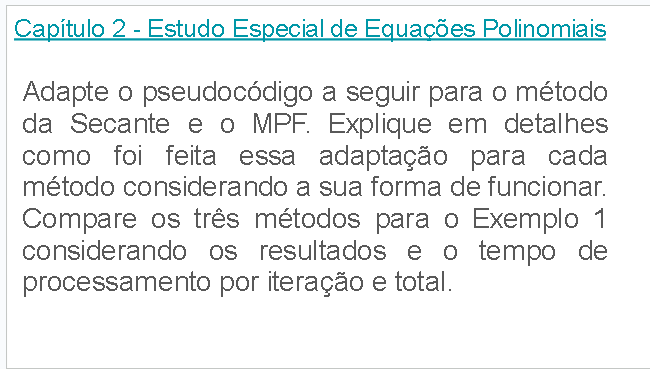

# Algoritmo de Horner (Birge–Vieta)

O **Algoritmo de Horner** é uma técnica eficiente para **avaliar polinômios e suas derivadas** em um ponto específico $x$.  
A ideia central é **evitar o cálculo explícito de potências de $x$**, que é computacionalmente caro e numericamente instável, usando uma **forma aninhada** do polinômio.

---

## 1. Representação do Polinômio

Considere um polinômio de grau $n$:

$$
P(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0
$$

Reescrevendo na forma de Horner:

$$
P(x) = (\dots((a_n x + a_{n-1})x + a_{n-2})x + \dots + a_0)
$$

Essa forma permite calcular o valor do polinômio com **operações sucessivas**, sem potências.

---

## 2. Funcionamento do Algoritmo (Ideia do Pseudocódigo)

O algoritmo utiliza **duas variáveis acumuladoras**, geralmente denotadas por $b$ e $c$.

---

### Variável $b$ — Avaliação de $P(x)$

- Inicialização:

$$
b = a_n
$$

- Iteração:

$$
b = a_i + b \cdot x
$$

- Ao final do laço:

$$
b = P(x)
$$

Ou seja, $b$ acumula o valor do polinômio no ponto $x$.

---

### Variável $c$ — Avaliação de $P'(x)$

- A variável $c$ calcula **simultaneamente a derivada do polinômio**.
- Ela utiliza os valores intermediários de $b$.
- A lógica é a mesma, mas deslocada uma ordem abaixo.

No final do processo:

$$
c = P'(x)
$$

---

## 3. Conexão com o Método de Newton (Newton–Horner)

O método de Newton exige o cálculo de:

$$
\Delta x = \frac{P(x)}{P'(x)}
$$

Como o algoritmo de Horner fornece **$P(x)$ e $P'(x)$ no mesmo laço**, ele se torna a base do método **Newton–Horner**, extremamente eficiente para encontrar raízes de polinômios.

---

## 4. Vantagens Computacionais

- **Velocidade**  
  Um polinômio de grau $n$ é avaliado com apenas:
  - $n$ multiplicações  
  - $n$ adições

- **Estabilidade Numérica**  
  Evita potências grandes de $x$, reduzindo erros de arredondamento.

- **Eficiência em Métodos Iterativos**  
  Ideal para métodos como Newton, pois:
  - Avalia $P(x)$ e $P'(x)$ simultaneamente
  - Reduz drasticamente o custo computacional por iteração

---

## 5. Interpretação Matemática

- Horner é uma **reorganização algébrica**, não uma aproximação.
- O método **não altera o polinômio**, apenas a forma de cálculo.
- Birge–Vieta é a interpretação do algoritmo no contexto de **raízes e deflação de polinômios**.

---


In [110]:
def newton_horner(coeficientes, x0, erro1=1e-6, erro2=1e-6, itmax=100):
    """
    coeficientes: lista [a0, a1, ..., an] (do menor para o maior grau)
    ou invertida conforme o pseudocódigo: [an, ..., a1, a0]
    Seguindo o pseudocódigo: a[n] é o termo de maior grau.
    """
    timestamps = []
    x = x0
    n = len(coeficientes) - 1 # Grau do polinômio
    k = 1

    # Invertendo a lista para que a[n] seja o primeiro elemento (índice 0)
    # conforme a lógica do pseudocódigo: b = a_n
    a = coeficientes[::-1]

    while True:
        marcar(timestamps)

        # 2) Algoritmo de Horner para P(x) e P'(x)
        b = a[0] # b = a_n
        c = b

        # Para i = (n-1) até 1
        for i in range(1, n):
            b = a[i] + b * x
            c = b + c * x

        # Cálculo final de b = a_0 + b*x (Valor de P(x))
        b = a[n] + b * x

        # Critério de parada pelo valor da função
        if abs(b) <= erro1:
            marcar(timestamps)
            return x, calcular_intervalos_reais(timestamps), k

        # deltax = b / c (P(x) / P'(x))
        deltax = b / c
        x = x - deltax

        # Critério de parada pelo deslocamento de x
        if abs(deltax) <= erro2:
            marcar(timestamps)
            return x, calcular_intervalos_reais(timestamps), k

        k += 1
        if k > itmax:
            marcar(timestamps)
            break

        marcar(timestamps)

    return x, calcular_intervalos_reais(timestamps), k

In [96]:
coefs = [-1.5, 4, -3.5, 1]
raiz, tempos, iters = newton_horner(coefs, 0.5)

print(f"Raiz encontrada: {raiz}")
print(f"Tempo total: {sum(tempos):.10f}s")

Raiz encontrada: 0.9991070573284887
Tempo total: 0.0000127780s


In [109]:
def secante_horner(coeficientes, x0, x1, erro1=1e-6, erro2=1e-6, itmax=100):
    """
    Adaptação do Método da Secante usando Horner para avaliação polinomial.
    coeficientes: [a0, a1, ..., an] (do menor para o maior grau)
    x0, x1: Aproximações iniciais
    """
    timestamps = []
    k = 1
    a = coeficientes[::-1]
    n = len(a) - 1

    def avaliar_horner(ponto):
        # Implementação do Passo 2 do pseudocódigo apenas para P(x)
        val_b = a[0]
        for i in range(1, n + 1):
            val_b = a[i] + val_b * ponto
        return val_b

    while True:
        marcar(timestamps)

        # Avalia P(x) nos dois pontos atuais usando Horner
        f_x0 = avaliar_horner(x0)
        f_x1 = avaliar_horner(x1)

        # 3) Cálculo da Secante (substituindo deltax = b/c do Newton)
        if (f_x1 - f_x0) == 0: break # Evita divisão por zero

        deltax = f_x1 * (x1 - x0) / (f_x1 - f_x0)
        x_novo = x1 - deltax

        # Critérios de parada (Passo 4 do pseudocódigo original)
        if abs(avaliar_horner(x_novo)) <= erro1 or abs(x_novo - x1) <= erro2:
            marcar(timestamps)
            return x_novo, calcular_intervalos_reais(timestamps), k

        # Atualização para a próxima iteração
        x0, x1 = x1, x_novo
        k += 1

        if k > itmax:
            marcar(timestamps)
            break

        marcar(timestamps)

    return x1, calcular_intervalos_reais(timestamps), k

In [97]:
coefs = [-1.5, 4, -3.5, 1] # a0, a1, a2, a3
raiz, tempos, iters = secante_horner(coefs, 0.5, 0.6)
print(f"Raiz: {raiz} | Iterações: {iters} | Tempo Total: {sum(tempos):.8e}s")

Raiz: 0.998773506187508 | Iterações: 13 | Tempo Total: 2.27300025e-05s


In [104]:
def mpf_horner(coeficientes, x0, phi_func, erro1=1e-6, erro2=1e-6, itmax=100):
    timestamps = []
    xi = x0
    a = coeficientes[::-1] # [an, ..., a0]
    n = len(a) - 1

    def avaliar_p_x(x_ponto):
        b = a[0]
        for i in range(1, n + 1):
            b = a[i] + b * x_ponto
        return b

    for k in range(1, itmax + 1):
        marcar(timestamps)

        p_x = avaliar_p_x(xi)
        # Ajuste aqui: a função phi da imagem 19 só usa x, ignoramos o p_x
        xi_mais1 = phi_func(xi)

        if abs(avaliar_p_x(xi_mais1)) <= erro1 or abs(xi_mais1 - xi) <= erro2:
            marcar(timestamps)
            return xi_mais1, calcular_intervalos_reais(timestamps), k

        xi = xi_mais1
        marcar(timestamps)

    return xi, calcular_intervalos_reais(timestamps), itmax

In [ ]:
# Zona de testes

In [121]:
import numpy as np
import time

# --- FUNÇÕES DE APOIO (MARCADORES DE TEMPO) ---
def marcar(lista):
    lista.append(time.perf_counter())

def calcular_intervalos_reais(lista_timestamps):
    return [lista_timestamps[i] - lista_timestamps[i-1] for i in range(1, len(lista_timestamps), 2)]

# --- CONFIGURAÇÃO DO POLINÔMIO (IMAGEM EXEMPLO 1) ---
def f_ex19(x):

    return 1*(x**5) - 3.7*(x**4) + 7.4*(x**3) - 10.8*(x**2) + 10.8*x - 6.8

def phi(x, p_x=None):

    return (3.7*x**4 - 7.4*x**3 + 10.8*x**2 - 10.8*x + 6.8)**(1/5)

# --- GERADOR DE TABELA AJUSTADO ---
def gerar_tabela_exemplo_1():
    erro_padrao = 1e-6
    # Coeficientes do menor grau para o maior: a0, a1, a2, a3, a4, a5
    # f(x) = -6.8 + 10.8x - 10.8x² + 7.4x³ - 3.7x⁴ + 1x⁵
    coeficientes = [-6.8, 10.8, -10.8, 7.4, -3.7, 1]

    # res = (raiz, tempos, k)
    try:
        res_mpf = mpf_horner(coeficientes, 1.5, phi, erro_padrao, erro_padrao)
        res_new = newton_horner(coeficientes, 1.5, erro_padrao, erro_padrao)
        res_sec = secante_horner(coeficientes, 1.0, 2.0, erro_padrao, erro_padrao)

        metodos = ["MPF-Horner", "Newton-Horner", "Secante-Horner"]
        resultados = [res_mpf, res_new, res_sec]
        dados_iniciais = ["x0=1.5", "x0=1.5", "x0=1; x1=2"]

        # Formatação da Tabela
        header = f"{'Método (Horner)':<15} | {'Dados Iniciais':<14} | {'x̄':<12} | {'f(x̄)':<10} | {'Iter':<6} | {'Tempo (s)':<10}"
        separator = "-" * len(header)

        print("\n" + separator)
        print(f"P(x) = x⁵ - 3.7x⁴ + 7.4x³ - 10.8x² + 10.8x - 6.8 | Erro = {erro_padrao}")
        print(separator)
        print(header)
        print(separator)

        for i, res in enumerate(resultados):
            print(f"{metodos[i]:<15} | {dados_iniciais[i]:<14} | {res[0]:<12.7f} | {f_ex19(res[0]):<10.2e} | {res[2]:<6} | {sum(res[1]):<10.2e}")

        print(separator)

    except NameError as e:
        print(f"Erro: Certifique-se de que as funções 'newton_horner', 'mpf_horner' e 'secante_horner' foram definidas. Detalhe: {e}")

# Executa a geração
gerar_tabela_exemplo_1()


----------------------------------------------------------------------------------
P(x) = x⁵ - 3.7x⁴ + 7.4x³ - 10.8x² + 10.8x - 6.8 | Erro = 1e-06
----------------------------------------------------------------------------------
Método (Horner) | Dados Iniciais | x̄           | f(x̄)      | Iter   | Tempo (s) 
----------------------------------------------------------------------------------
MPF-Horner      | x0=1.5         | 1.6999954    | -3.34e-05  | 55     | 6.99e-05  
Newton-Horner   | x0=1.5         | 1.7000001    | 4.19e-07   | 5      | 4.24e-06  
Secante-Horner  | x0=1; x1=2     | 1.7000000    | -4.03e-09  | 8      | 3.34e-05  
----------------------------------------------------------------------------------


In [124]:
import numpy as np
import time

# --- CONFIGURAÇÃO DO POLINÔMIO (IMAGEM FINAL - p3(x)) ---
def f_ex_final(x):
    # Polinômio da imagem 13: x³ - 3x + 3
    return x**3 - 3*x + 3

def phi_final(x, p_x=None):

    val = 3*x - 3
    return np.sign(val) * (abs(val))**(1/3)

# --- GERADOR DE TABELA AJUSTADO ---
def gerar_tabela_exemplo_p3():
    # Dados extraídos da imagem 13
    erro_padrao = 1e-6
    # Coeficientes de p3(x) = 1x³ + 0x² - 3x + 3
    # Ordem: [a0, a1, a2, a3]
    coeficientes = [3, -3, 0, 1]

    try:
        # Casos de teste extraídos da descrição da imagem 13:
        # i) x0 = -0.8 (Newton) -> Resulta em -2.103801 em 17 iterações
        # ii) x0 = -2.0 (Newton) -> Resulta no mesmo em 3 iterações
        res_new_i  = newton_horner(coeficientes, -0.8, erro_padrao, erro_padrao)
        res_new_ii = newton_horner(coeficientes, -2.0, erro_padrao, erro_padrao)

        # Secante usando o intervalo da imagem (-3, -1.5)
        res_sec = secante_horner(coeficientes, -3.0, -1.5, erro_padrao, erro_padrao)

        metodos = ["Newton (x0=-0.8)", "Newton (x0=-2.0)", "Secante-Horner"]
        resultados = [res_new_i, res_new_ii, res_sec]
        dados_iniciais = ["x0 = -0.8", "x0 = -2.0", "x0=-3; x1=-1.5"]

        header = f"{'Método (Horner)':<18} | {'Dados Iniciais':<16} | {'x̄':<12} | {'f(x̄)':<10} | {'Iter':<6} | {'Tempo (s)':<10}"
        separator = "-" * len(header)

        print("\n" + separator)
        print(f"P(x) = x³ - 3x + 3 | Erro = {erro_padrao}")
        print(separator)
        print(header)
        print(separator)

        for i, res in enumerate(resultados):
            print(f"{metodos[i]:<18} | {dados_iniciais[i]:<16} | {res[0]:<12.7f} | {f_ex_final(res[0]):<10.2e} | {res[2]:<6} | {sum(res[1]):<10.2e}")

        print(separator)

    except NameError:
        print("Erro: Certifique-se de que as funções 'horner' (Newton e Secante) estão definidas no ambiente.")

# Executa a geração
gerar_tabela_exemplo_p3()


---------------------------------------------------------------------------------------
P(x) = x³ - 3x + 3 | Erro = 1e-06
---------------------------------------------------------------------------------------
Método (Horner)    | Dados Iniciais   | x̄           | f(x̄)      | Iter   | Tempo (s) 
---------------------------------------------------------------------------------------
Newton (x0=-0.8)   | x0 = -0.8        | -2.1038034   | -7.68e-10  | 18     | 1.72e-05  
Newton (x0=-2.0)   | x0 = -2.0        | -2.1038034   | -6.70e-09  | 4      | 2.76e-06  
Secante-Horner     | x0=-3; x1=-1.5   | -2.1038034   | 4.37e-11   | 7      | 1.81e-05  
---------------------------------------------------------------------------------------
